## **Exploração, limpeza e análise de dados de clientes que possuem cartão de crédito de um banco.**

O dataset possui as informações dos clientes, separadas da seguinte forma:

* idade = idade do cliente
* sexo = genêro do cliente (M: masculino, F: feminino)
* dependentes = número de dependetes do cliente
* escolaridade = nível de escolaridade do cliente
* estado_civil = estado civíl do cliente
* salario_anual = faixa de salário anual do cliente
* tipo_cartao = tipo de cartão do cliente
* meses_de_relacionamento = total de meses que são clientes
* qtd_produtos = quantidade de produtos comprado nos últimos 12 meses
* iteracoes_12m = quantidade de interações nos últimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente não utilizou o cartão
* limite_credito = limite de crédtio do cartão
* valor_transacoes_12m = valor das transações dos últimos 12 meses
* qtd_transacoes_12m = quantidade de transações dos últimos 12 meses




Nesse projeto iremos fazer a exploração do dataset, identificar os dados nulos e analisar o perfil dos clientes do banco.

In [3]:
# Importando bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [7]:
# import data e convertendo as colunas limite_Credito e valor_Transacoes_12m para float
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv', thousands='.', decimal=',', dtype={'limite_credito':np.float64, 'valor_transacoes_12m':np.float64})
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28


## **Explorando os dados:**

Aqui veremoscomo nosso dataset é composto, verificar os dados nulos, tratar os dados para que no final consigamos traçar o perfil de alguns clientes.

In [8]:
# informações sobre o DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             10127 non-null  object 
 6   estado_civil             10127 non-null  object 
 7   salario_anual            10127 non-null  object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

In [9]:
# escluindo colunas irrelevantes
df = df.drop(columns=['id'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   default                  10127 non-null  int64  
 1   idade                    10127 non-null  int64  
 2   sexo                     10127 non-null  object 
 3   dependentes              10127 non-null  int64  
 4   escolaridade             10127 non-null  object 
 5   estado_civil             10127 non-null  object 
 6   salario_anual            10127 non-null  object 
 7   tipo_cartao              10127 non-null  object 
 8   meses_de_relacionamento  10127 non-null  int64  
 9   qtd_produtos             10127 non-null  int64  
 10  iteracoes_12m            10127 non-null  int64  
 11  meses_inativo_12m        10127 non-null  int64  
 12  limite_credito           10127 non-null  float64
 13  valor_transacoes_12m     10127 non-null  float64
 14  qtd_transacoes_12m    

In [11]:
# verificando dados faltantes/nulos
df.isnull().any()

default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

> Não possui valores nulos, mas como verificamos há valores com 'na' e precisamos saber disso e de que forma isso pode afetar nosso estudo.

In [13]:
# Como notamos que algumas colunas possuem os valores 'na' (valores nulos) apesar de não constarem na linha acima, precisamos levar isso em consideração para análises futuras
for col in df.select_dtypes('object'):
    print(df[col].unique())

['M' 'F']
['ensino medio' 'mestrado' 'sem educacao formal' 'na' 'graduacao'
 'doutorado']
['casado' 'solteiro' 'na' 'divorciado']
['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'na']
['blue' 'gold' 'silver' 'platinum']


#### *Verificando os valores nulos nas colunas escolaridade, estado_civil e salario_anual:*

In [14]:
# escolaridade
display(df.groupby(['escolaridade'])['escolaridade'].count().reset_index(name='QTD'))

# estado_civil
display(df.groupby(['estado_civil'])['estado_civil'].count().reset_index(name='QTD'))

# salario_anual
display(df.groupby(['salario_anual'])['salario_anual'].count().reset_index(name='QTD'))

,escolaridade,QTD
0,doutorado,967
1,ensino medio,2013
2,graduacao,1013
3,mestrado,3128
4,na,1519
5,sem educacao formal,1487


,estado_civil,QTD
0,casado,4687
1,divorciado,748
2,na,749
3,solteiro,3943


,salario_anual,QTD
0,$120K +,727
1,$40K - $60K,1790
2,$60K - $80K,1402
3,$80K - $120K,1535
4,menos que $40K,3561
5,na,1112


> Aqui verificamos que há alguns dados classificados como 'na', que podem ser considerados como 'dados faltantes' e devemos observar isso para a geração dos gráficos.

## **Análisando os dados:**

Após identificar e limpeza dos dados, iremos ver alguns dados relevantes e após isso  gerar alguns gráficos pra facilitar a vizualização dos clientes.

In [15]:
# identificando alguns parâmetros relevantes
display(df.describe().transpose())


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Média de idade dos clientes é: 46 anos

Média de dependentes é: 2



In [16]:
# verificar idade média dos salários

df.query('salario_anual == "$120K +"').describe().T

,count,mean,std,min,25%,50%,75%,max
default,727.0,0.173315,0.378780,0.0,0.00,0.00,0.00,1.00
idade,727.0,47.603851,6.769921,26.0,43.00,49.00,53.00,62.00
dependentes,727.0,2.462173,1.166987,0.0,2.00,2.00,3.00,5.00
meses_de_relacionamento,727.0,36.891334,7.358623,13.0,33.00,36.00,42.00,54.00
qtd_produtos,727.0,3.778542,1.572554,1.0,3.00,4.00,5.00,6.00
iteracoes_12m,727.0,2.537827,1.124918,0.0,2.00,3.00,3.00,6.00
meses_inativo_12m,727.0,2.331499,0.972847,0.0,2.00,2.00,3.00,6.00
limite_credito,727.0,19717.809807,12064.318184,1438.2,8466.84,18442.32,34516.09,34516.98
valor_transacoes_12m,727.0,4529.968638,3816.059043,602.6,1871.10,3643.78,4831.77,16695.48
qtd_transacoes_12m,727.0,63.704264,25.750910,10.0,43.00,64.00,81.00,139.00


In [17]:
df.describe(include=['O']).transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


>Aqui podemos ver os dados mais comuns do nosso dataset

*Algumas observações:*
* A maior parte dos clientes são mulheres;
* A maior parte dos clientes possuem mestrado;
* A maior parte dos clientes são casados;
* A maior parte dos clientes ganham menos que $40K;
* A maior parte dos clientes possuem cartão do tipo blue.

In [18]:
df.query('sexo == "F"').describe(include=['O']).T

,count,unique,top,freq
sexo,5358,1,F,5358
escolaridade,5358,6,mestrado,1670
estado_civil,5358,4,casado,2451
salario_anual,5358,3,menos que $40K,3284
tipo_cartao,5358,4,blue,5101


In [19]:
df.query('sexo == "M"').describe(include=['O']).T

,count,unique,top,freq
sexo,4769,1,M,4769
escolaridade,4769,6,mestrado,1458
estado_civil,4769,4,casado,2236
salario_anual,4769,6,$80K - $120K,1535
tipo_cartao,4769,4,blue,4335


>Aqui o que nos chama atenção é de que a maioria dos clientes homens são casados e ganham 2x mais que as mulheres.

>Mesmo com a faixa de valores tão alta, os clientes possuem cartões do tipo blue.

In [20]:
df.query('salario_anual == "$80K - $120K"').describe(include=['O']).T

,count,unique,top,freq
sexo,1535,1,M,1535
escolaridade,1535,6,mestrado,478
estado_civil,1535,4,casado,735
salario_anual,1535,1,$80K - $120K,1535
tipo_cartao,1535,4,blue,1395


In [21]:
df.query('estado_civil != "casado"').describe(include=['O']).T

,count,unique,top,freq
sexo,5440,2,F,2907
escolaridade,5440,6,mestrado,1649
estado_civil,5440,3,solteiro,3943
salario_anual,5440,6,menos que $40K,1933
tipo_cartao,5440,4,blue,5003


In [22]:
df.query('estado_civil == "solteiro"').describe(include=['O']).T

,count,unique,top,freq
sexo,3943,2,F,2125
escolaridade,3943,6,mestrado,1197
estado_civil,3943,1,solteiro,3943
salario_anual,3943,6,menos que $40K,1429
tipo_cartao,3943,4,blue,3624


In [53]:
df_limite = df.query('salario_anual != "na"').groupby(['sexo','salario_anual'])[['limite_credito','salario_anual','sexo']]
df_limite.head()


,limite_credito,salario_anual,sexo
0,12691.51,$60K - $80K,M
1,8256.96,menos que $40K,F
2,3418.56,$80K - $120K,M
3,3313.03,menos que $40K,F
4,4716.22,$60K - $80K,M
5,4010.69,$40K - $60K,M
6,34516.72,$120K +,M
7,29081.49,$60K - $80K,M
8,22352.50,$60K - $80K,M
9,11656.41,$80K - $120K,M


In [24]:
df_cartao = df.query('salario_anual != "na"').groupby(['salario_anual','tipo_cartao'])['tipo_cartao'].count().reset_index(name='QTD')
#df_cartao = df_cartao
df_cartao.head()

,salario_anual,tipo_cartao,QTD
0,$120K +,blue,645
1,$120K +,gold,18
2,$120K +,platinum,4
3,$120K +,silver,60
4,$40K - $60K,blue,1675


### Análise Gráfica

[Text(0.5, 1.0, 'Quantidade de Clientes por gênero')]

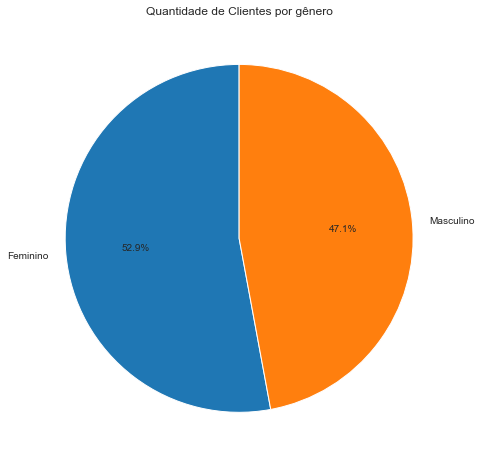

In [68]:
df_sexo = df.groupby(['sexo'])['sexo'].count().reset_index(name='QTD')

fig, ax = plt.subplots(figsize=(12,8))
ax.pie(df_sexo['QTD'], labels=['Feminino', 'Masculino'], autopct='%1.1f%%', startangle=90)
ax.set(title='Quantidade de Clientes por gênero')

[Text(0.5, 1.0, 'Quantidade de Clientes por Tipo de cartão por Salário Anual'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 0, 'Tipo de Cartão')]

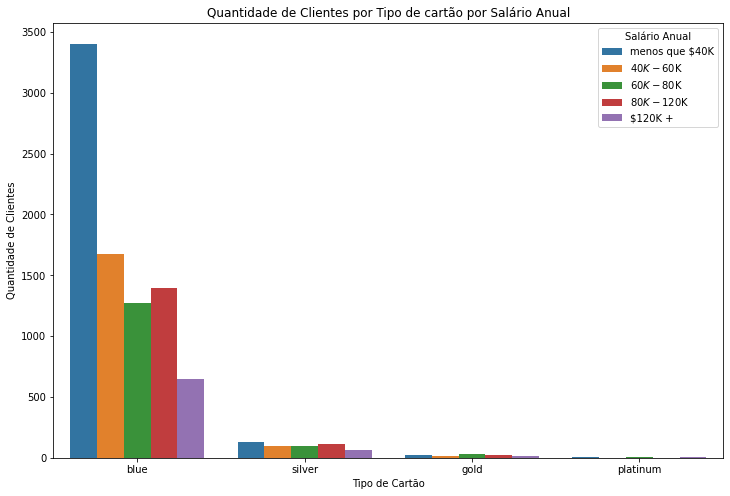

In [31]:
labels_salario = ['menos que $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +']
fig, ax = plt.subplots(figsize=(12,8))
labels = ['blue', 'silver', 'gold', 'platinum']
sns.barplot(data=df_cartao, ax=ax, x='tipo_cartao', y='QTD', hue='salario_anual', hue_order=labels_salario, order=labels)
ax.legend(title='Salário Anual',)
ax.set(title='Quantidade de Clientes por Tipo de cartão por Salário Anual', ylabel='Quantidade de Clientes', xlabel='Tipo de Cartão')

In [ ]:
# gráfico usando plotly.express
px.bar(df_cartao, x='tipo_cartao', y='QTD', hover_data=['salario_anual'], 
    labels={'tipo_cartao':'Tipos de cartões', 'QTD':'Quantidade de clientes'}, 
    color='salario_anual')
plt.title("")

Separando por sexo

In [35]:
df_genero = df.query('salario_anual != "na"').groupby(['sexo', 'salario_anual'])['sexo'].count().reset_index(name='QTD')

df_genero.head(10).sort_values(by='QTD')

,sexo,salario_anual,QTD
6,M,menos que $40K,277
2,M,$120K +,727
3,M,$40K - $60K,776
0,F,$40K - $60K,1014
4,M,$60K - $80K,1402
5,M,$80K - $120K,1535
1,F,menos que $40K,3284


[Text(0.5, 0, 'Gênero'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 1.0, 'Salário Anual por Gênero'),
 [Text(0, 0, 'Feminino'), Text(1, 0, 'Masculino')]]

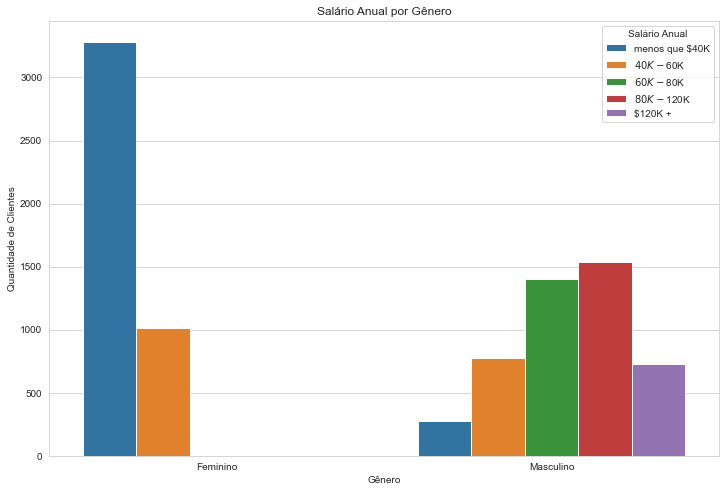

In [37]:

fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(data=df_genero, ax=ax, x='sexo', y='QTD', hue='salario_anual', hue_order=labels_salario)
ax.legend(title='Salário Anual')
ax.set(xlabel='Gênero', ylabel='Quantidade de Clientes', title='Salário Anual por Gênero', xticklabels=['Feminino','Masculino'])


>Aqui podemos notar que apenas o sexo masculino possui salários maiores do que 60k.

Separando por idade

In [33]:
df_idade = df.query('salario_anual != "na"').groupby(['idade', 'salario_anual'])['idade'].count().reset_index(name='QTD')


[Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Quantidade de clientes'),
 Text(0.5, 1.0, 'Salário Anual por Idade')]

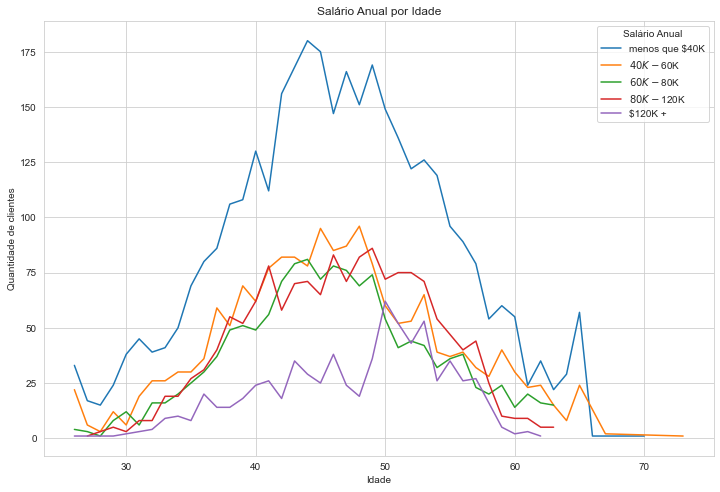

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.lineplot(data=df_idade, x='idade', y='QTD', hue='salario_anual', hue_order=labels_salario)
ax.legend(title='Salário Anual')
ax.set(xlabel='Idade', ylabel='Quantidade de clientes', title='Salário Anual por Idade')

In [38]:
# quantidade de produtos que os homens e as mulheres compram separados por cartão, salário, dependentes:
df_produto = df.groupby(['sexo','qtd_produtos', 'salario_anual'])['sexo'].count().reset_index(name='QTD')
df_produto_cartao = df.query('tipo_cartao != "blue"').groupby(['sexo', 'qtd_produtos', 'tipo_cartao'])['tipo_cartao'].count().reset_index(name='QTD')
df_dependente = df.groupby(['sexo', 'dependentes'])['dependentes'].count().reset_index(name='QTD')



Dependentes por sexo

[Text(0.5, 0, 'Quantidade de dependentes'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 1.0, 'Quantidade de clientes por Quantidade de Dependentes')]

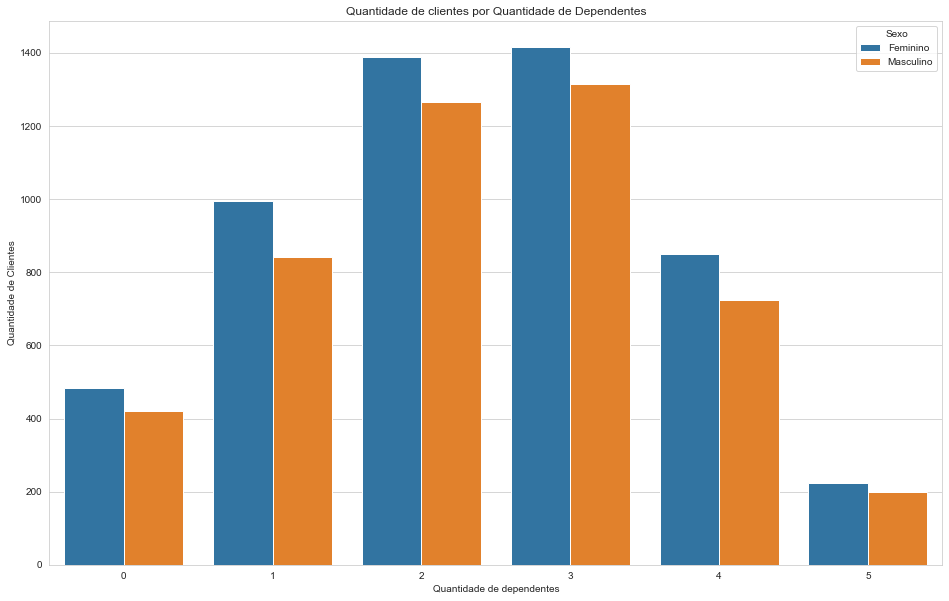

In [39]:
fig, ax = plt.subplots(figsize=(16,10))
sns.set_style('whitegrid')
sns.barplot(data=df_dependente, ax=ax, x='dependentes', y='QTD', hue='sexo', ci=None)
ax.legend(title='Sexo', labels={'Feminino':'F', 'Masculino':'M'})
ax.set(xlabel='Quantidade de dependentes', ylabel='Quantidade de Clientes', title='Quantidade de clientes por Quantidade de Dependentes')

Quantidade de produto por salário anual

[Text(0.5, 0, 'Quantidade de produtos'),
 Text(0, 0.5, 'Quantidade de clientes'),
 Text(0.5, 1.0, 'Quantidade de produtos por salário')]

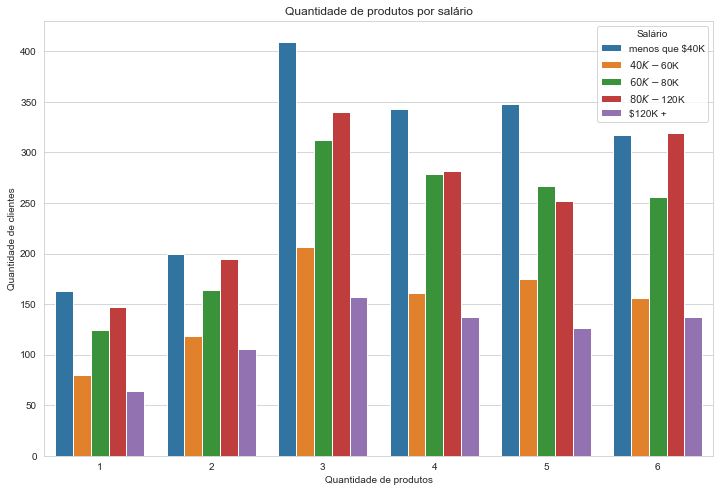

In [40]:
#quantidade de produto por salário
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(data=df_produto, ax=ax, x='qtd_produtos', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
ax.legend(title='Salário')
ax.set(xlabel='Quantidade de produtos', ylabel='Quantidade de clientes', title='Quantidade de produtos por salário')

Dependentes e escolaridade

[Text(0.5, 0, 'Escolaridade'),
 Text(0, 0.5, 'Quantidade de clientes'),
 Text(0.5, 1.0, 'Quantidade clientes por escolaridade')]

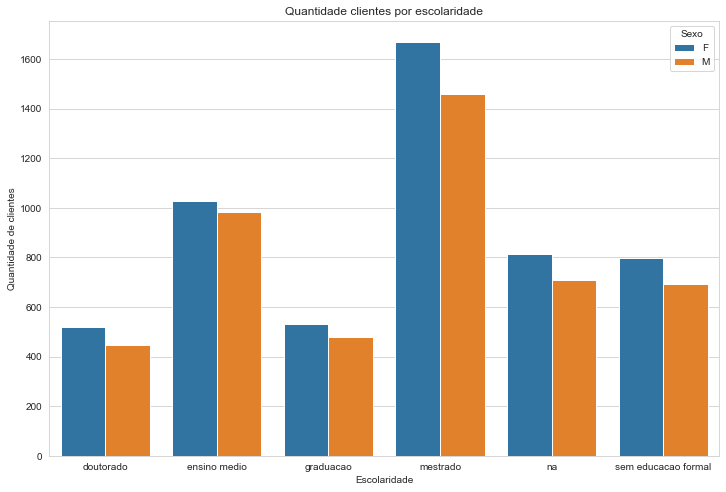

In [48]:
#dependentes e escolaridade
df_esc = df.groupby(['sexo', 'escolaridade'])['sexo'].count().reset_index(name='QTD')
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(data=df_esc, ax=ax, x='escolaridade', y='QTD', hue='sexo')
ax.legend(title='Sexo')
ax.set(xlabel='Escolaridade', ylabel='Quantidade de clientes', title='Quantidade clientes por escolaridade')

Escolaridade e salário

[Text(0.5, 0, 'Escolaridade'),
 Text(0, 0.5, 'Quantidade de clientes'),
 Text(0.5, 1.0, 'Quantidade clientes por escolaridade por salário anual')]

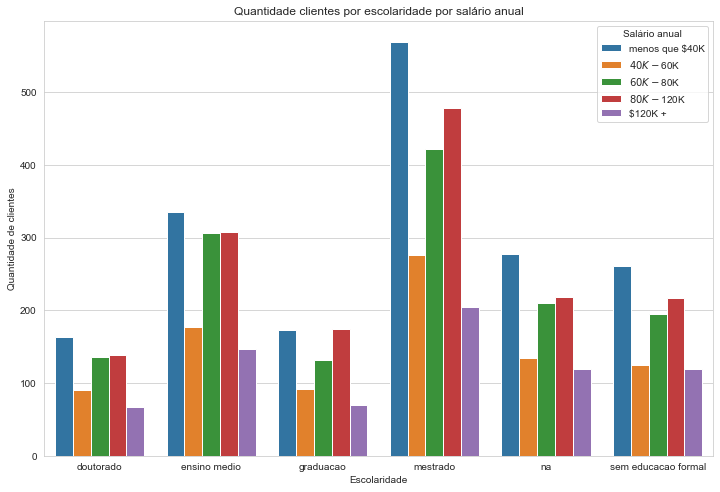

In [49]:
#salario e escolaridade
df_esc_cartao = df.groupby(['sexo', 'escolaridade','salario_anual'])['sexo'].count().reset_index(name='QTD')

fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(data=df_esc_cartao, ax=ax, x='escolaridade', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
ax.legend(title='Salário anual')
ax.set(xlabel='Escolaridade', ylabel='Quantidade de clientes', title='Quantidade clientes por escolaridade por salário anual')

>Maior parte dos clientes possuem mestrado e ensino médio e não necessáriamente os que possuem maior escolaridade são os que ganham mais.

Text(0.5, 1.0, 'Quantidade clientes do sexo masculino por escolaridade por salário anual')

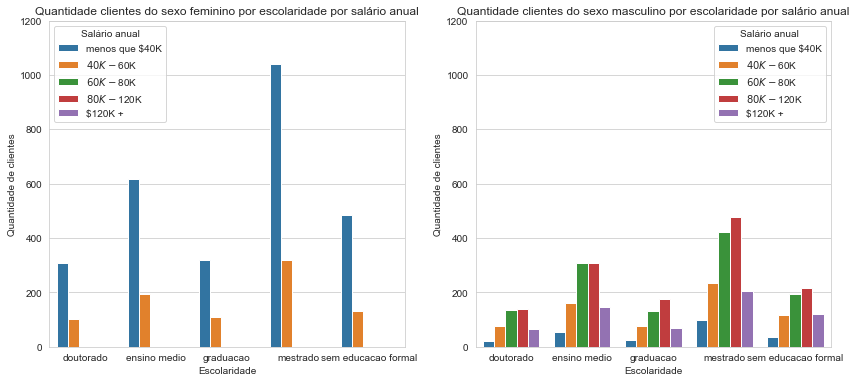

In [50]:
df_esc_fem = df.query('sexo == "F" and escolaridade != "na"').groupby(['sexo', 'escolaridade','salario_anual'])['sexo'].count().reset_index(name='QTD')
df_esc_mas = df.query('sexo == "M" and escolaridade != "na"').groupby(['sexo', 'escolaridade','salario_anual'])['sexo'].count().reset_index(name='QTD')

fig = plt.figure(figsize=(14,6))
sns.set_style('whitegrid')

# grafico feminino
plt.subplot(1,2,1)
sns.barplot(data=df_esc_fem, x='escolaridade', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
plt.legend(title='Salário anual')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade de clientes')
plt.yticks(range(0, 1201, 200))
plt.title('Quantidade clientes do sexo feminino por escolaridade por salário anual')

# grafico masculino
plt.subplot(1,2,2)
sns.barplot(data=df_esc_mas, x='escolaridade', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
plt.legend(title='Salário anual')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade de clientes')
plt.yticks(range(0, 1201, 200))
plt.title('Quantidade clientes do sexo masculino por escolaridade por salário anual')

> Independete da formação das mulheres elas ganham até $60K

Estado civil e salário anual

[Text(0.5, 0, 'Estado Civil'),
 Text(0, 0.5, 'Quantidade de clientes'),
 Text(0.5, 1.0, 'Quantidade clientes por estado civil por salário anual')]

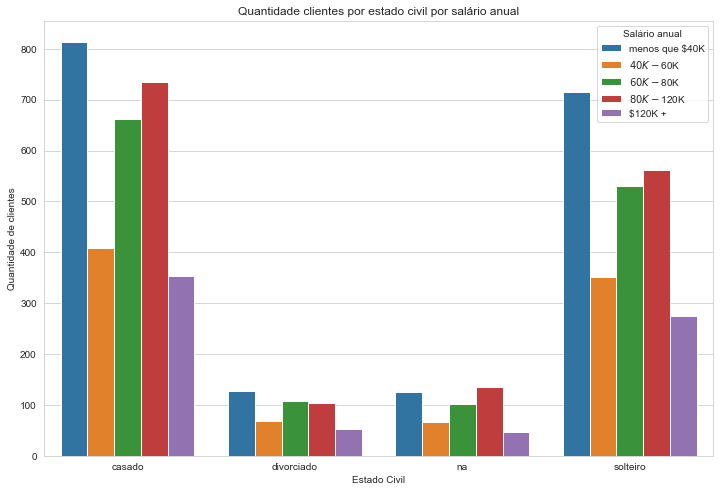

In [51]:
#salario e estado civil
df_esc_civil = df.groupby(['sexo', 'estado_civil','salario_anual'])['sexo'].count().reset_index(name='QTD')

fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(data=df_esc_civil, ax=ax, x='estado_civil', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
ax.legend(title='Salário anual')
ax.set(xlabel='Estado Civil', ylabel='Quantidade de clientes', title='Quantidade clientes por estado civil por salário anual')

>Os clientes são em maioria casados ou solteiros

Text(0.5, 1.0, 'Quantidade clientes do sexo masculino por estado civil por salário anual')

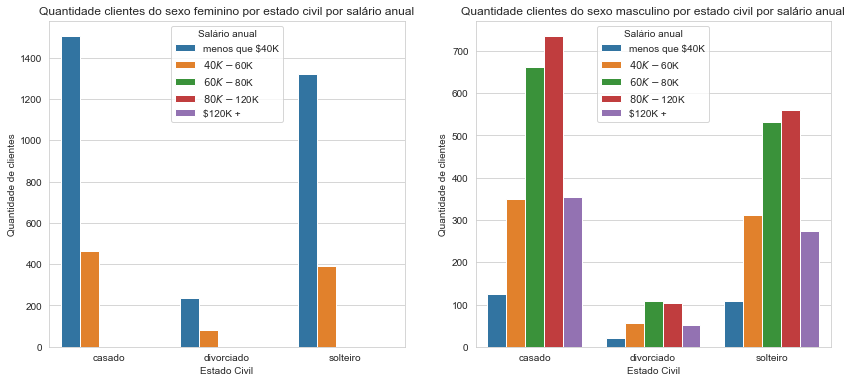

In [ ]:
df_fem = df.query('sexo == "F" and estado_civil != "na"').groupby(['sexo', 'estado_civil','salario_anual'])['sexo'].count().reset_index(name='QTD')
df_mas = df.query('sexo == "M" and estado_civil != "na"').groupby(['sexo', 'estado_civil','salario_anual'])['sexo'].count().reset_index(name='QTD')
fig = plt.figure(figsize=(14,6))
sns.set_style('whitegrid')

# grafico feminino
plt.subplot(1,2,1)
sns.barplot(data=df_fem, x='estado_civil', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
plt.legend(title='Salário anual')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de clientes')
plt.title('Quantidade clientes do sexo feminino por estado civil por salário anual')

# grafico masculino
plt.subplot(1,2,2)
sns.barplot(data=df_mas, x='estado_civil', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
plt.legend(title='Salário anual')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de clientes')
plt.title('Quantidade clientes do sexo masculino por estado civil por salário anual')

Meses inativo e salário

[Text(0.5, 0, 'Quantidade de meses inativo (12 meses)'),
 Text(0, 0.5, 'Quantidade de clientes'),
 Text(0.5, 1.0, 'Quantidade clientes por meses inativo por salário anual')]

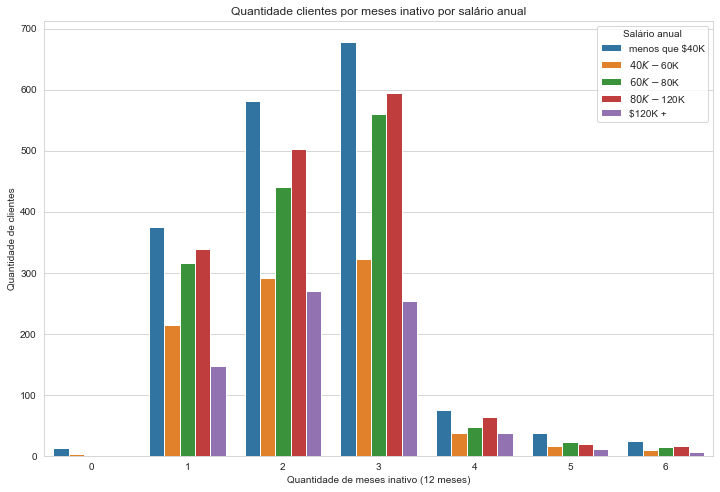

In [52]:
df_inativo = df.groupby(['sexo', 'meses_inativo_12m','salario_anual'])['sexo'].count().reset_index(name='QTD')

fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(data=df_inativo, ax=ax, x='meses_inativo_12m', y='QTD', hue='salario_anual', hue_order=labels_salario, ci=None)
ax.legend(title='Salário anual')
ax.set(xlabel='Quantidade de meses inativo (12 meses)', ylabel='Quantidade de clientes', title='Quantidade clientes por meses inativo por salário anual')